<img style="float: left;" src="../images/fanniemae.png">
<br><br><br><br><br><br>
______

# Mortgage Loan Default Classifier
____________
____________

## Problem Statement:
_____________
Fannie Mae, or more specifically the Federal National Mortgage Association (FNMA), is a government sponsored entity whose primary goal is to raise home ownership and affordable housing levels.  Fannie Mae attempts to accomplish this in essence by purchasing mortgage loans within certain parameters from mortgage lenders.  In turn, mortgage lenders are provided cash flow to issue additional mortgages.<br>

The cause of the Financial Crisis of 2008 can in part be drawn back to the purchase of mortgage loans with an actual probability of default that were higher than assumed.  By creating a classification model that will predict whether a mortgage loan will default based on pre-purchase characteristics, Fannie Mae may better avoid high risk mortgage loans.  The model will be evaluated based on Accuracy and False Negative Rate.  In this particular case, the "positive" class will be loans that default therefore, we will seek to minimize the False Negative Rate while maximizing Accuracy.

## EDA
_________
Additional insights into the data can be gained through some basic exploratory data analysis.  The primary take aways from this exploration is the identification of unbalanced classes and the correlation of continuous features to the target classes.

Unbalanced classes is a common occurence in default classification.  The Non-Default class will be represented by 0 whereas the Default class will be represented by 1.  In this specific dataset, the totals for the Non-Default and Default classes are 502998 and 1561 respectively.  Proportionally, the Default observations only accounts for 0.31% of the total observations which equates to an extremely unbalanced target.  This poses a hurdle in modeling process.  Specifically, due to the imbalance, the model will lean towards always predicting a Non-Default.  For the model to work appropriately, a balanced training dataset will need to be created.

### Import packages 

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load dataset

In [2]:
df = pd.read_csv('../data/complete2011q1.csv')
df.head()

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),NUMBER OF BORROWERS,ORIGINAL DEBT TO INCOME RATIO,...,LOAN PURPOSE,PROPERTY TYPE,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,PRODUCT TYPE,RELOCATION MORTGAGE INDICATOR,DEFAULT,MI,MIN CREDIT SCORE
0,100000841305,C,"CITIMORTGAGE, INC.",4.125,124000,360,79,79.0,1.0,28.0,...,R,SF,1,P,TX,FRM,N,0,0.0,792.0
1,100001889356,R,OTHER,4.625,115000,240,68,68.0,1.0,34.0,...,C,SF,1,P,IL,FRM,N,0,0.0,705.0
2,100006453372,C,"BANK OF AMERICA, N.A.",4.375,175000,360,52,52.0,2.0,29.0,...,C,PU,1,S,AZ,FRM,N,0,0.0,776.0
3,100010656545,C,"BANK OF AMERICA, N.A.",4.375,365000,360,59,59.0,3.0,40.0,...,C,PU,1,P,IL,FRM,N,0,0.0,797.0
4,100010758624,R,"CITIMORTGAGE, INC.",3.875,69000,120,28,28.0,1.0,32.0,...,C,SF,1,P,SC,FRM,N,0,0.0,785.0


### Visualizations

In [14]:
# value counts of target
df['DEFAULT'].value_counts()

0    502998
1      1561
Name: DEFAULT, dtype: int64

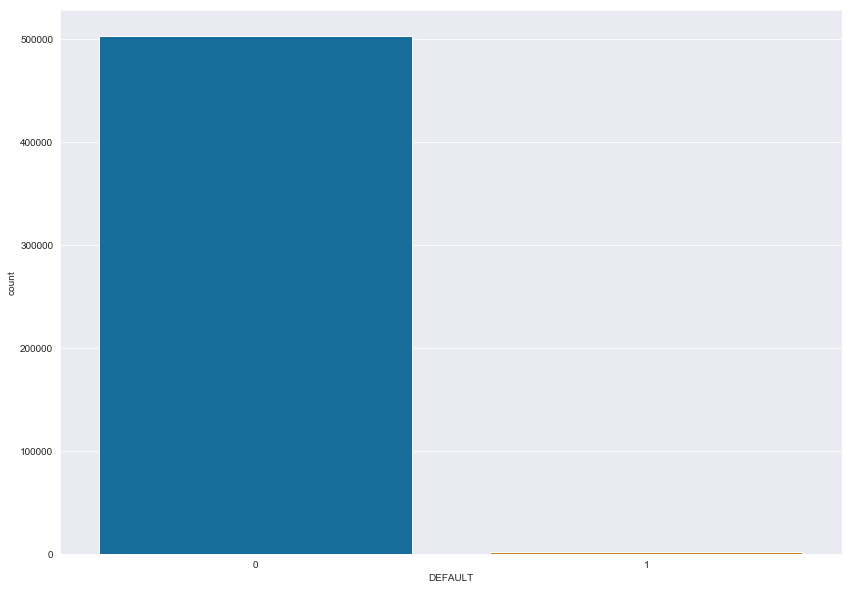

In [13]:
# distribution of target
sns.set_style("darkgrid")
plt.figure(figsize=(14,10))
ax = sns.countplot(df['DEFAULT']);

__Insight:__
As noted before, the target classes are extremely unbalanced.  The Default class is represented by the orange sliver.

In [4]:
# box plots of continuous features versus target
continuous_features = ['ORIGINAL INTEREST RATE', 'ORIGINAL UPB', 'ORIGINAL LOAN-TO-VALUE (LTV)', 
                       'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)', 'ORIGINAL DEBT TO INCOME RATIO', 'MIN CREDIT SCORE']

In [5]:
# boxplots of numerical features
def subplot_boxplots(df, columns, ncols = 2):
    nrows = int(np.ceil(len(columns)/ncols))    
    f, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                           figsize=(16, nrows*10))
    f.subplots_adjust(hspace=.33, wspace=.33)
    ax = ax.ravel()                                
    sns.set_palette("colorblind")
    
    for i, column in enumerate(columns): 
        sns.boxplot(x='DEFAULT', y=column, data=df , ax=ax[i]).set_title(f'Distribution of \n{column}', fontsize = 15)

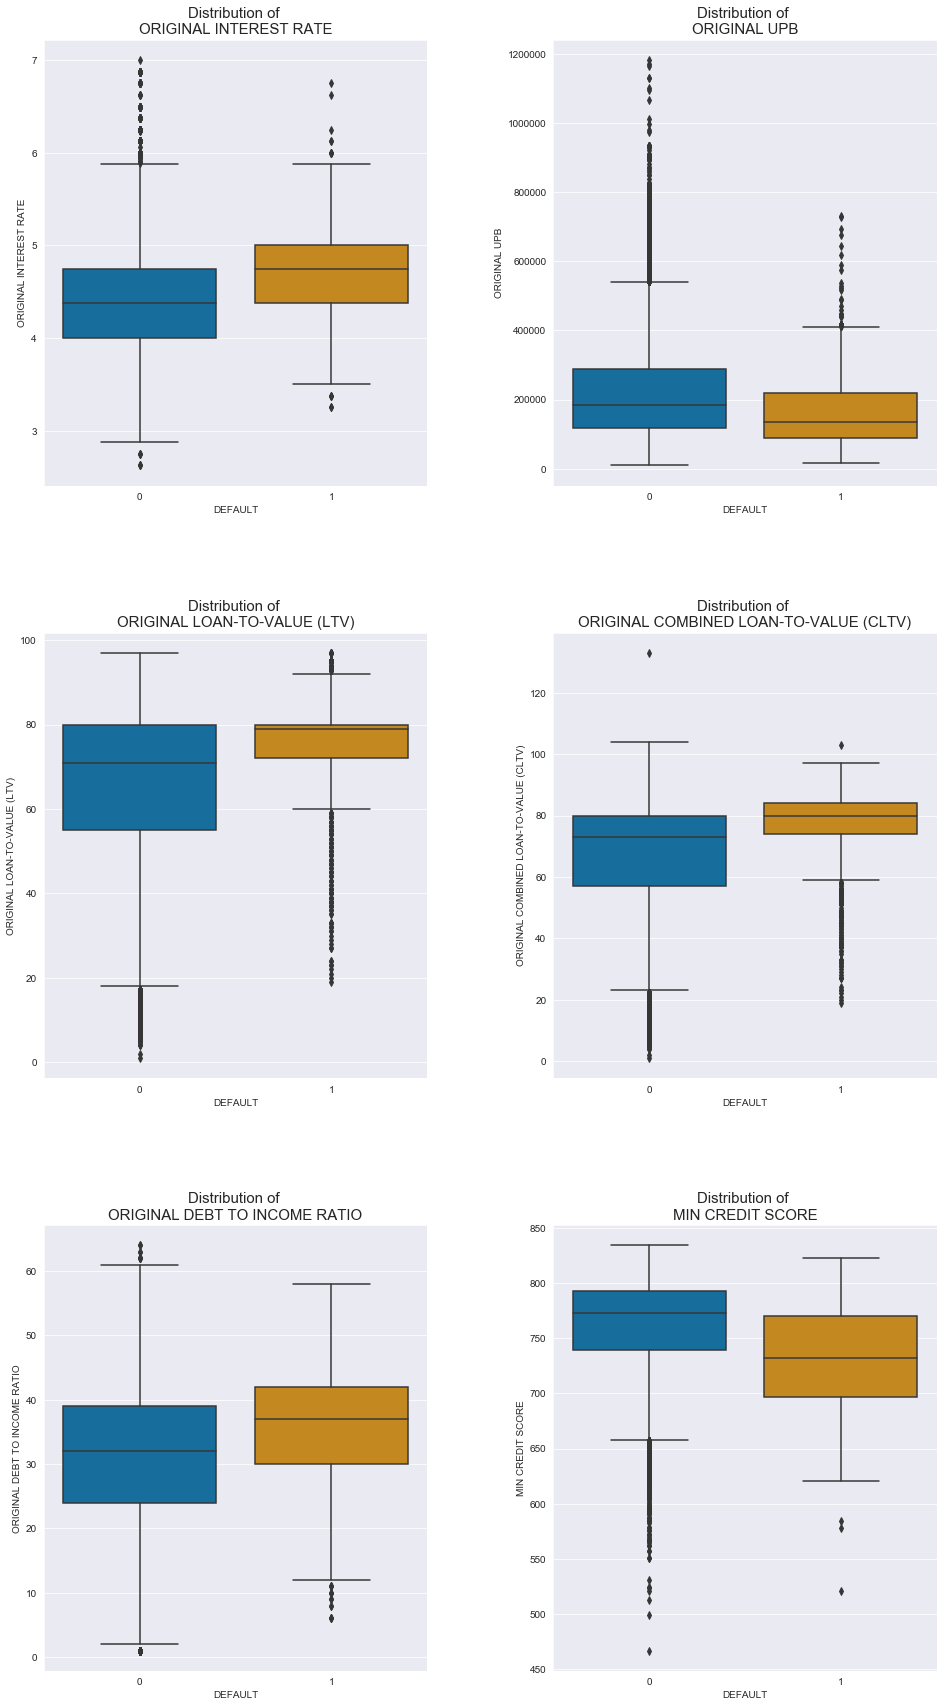

In [6]:
subplot_boxplots(df, continuous_features);

__Insight:__<br>
The boxplots of the continuous features subset by target classes appears to highlight a correlation between each feature and whether a loan will default.  Additionally, the existence of possible outliers as noted previously is also visualized here.  Future considerations will explore the effect of these outliers.  For the scope of this project, outliers will be retained.

In [15]:
pd.DataFrame(df[continuous_features].corrwith(df['DEFAULT']), columns=['DEFAULT']).sort_values(by='DEFAULT')

,DEFAULT
MIN CREDIT SCORE,-0.043189
ORIGINAL UPB,-0.021260
ORIGINAL DEBT TO INCOME RATIO,0.023518
ORIGINAL LOAN-TO-VALUE (LTV),0.031386
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),0.031544
ORIGINAL INTEREST RATE,0.037463


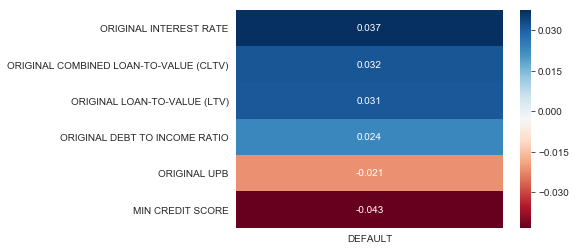

In [8]:
# correlation to target
sns.heatmap(pd.DataFrame(df[continuous_features].corrwith(df['DEFAULT']), columns=['DEFAULT']).sort_values(by='DEFAULT', 
                                                                                                           ascending=False),
            annot=True, 
            cmap='RdBu')

__Insight:__<br>
The boxplots inferred a correlation between the continuous features however, the correlation is not a strong as previously perceived.  As a rule of thumb, a strong correlation can be seen as having over a 0.5 correlation value.  The interaction between these features may be more influential than the stand alone feature.